# Fitting Data from an Experiment

The generic physics experiment goes as follows:  we measure some quantity, $y$, as a function of some other quantity, $x$.  We plot that data, and then we attempt to find a function, $y_{fit} = f(x)$ that best describes the data.  Typically, the function $f(x)$
will contain several parameters.  We seek to determine the values of these parameters (with uncertainties!) that give the best fit to the data, and then in turn we may be able to
extract interesting physics knowledge through the comparison of the parameter values to
either a theoretical prediction, or other measurments, or both.

In addition, in most (maybe all?) experiments, we have uncertainties,$\delta y$, associated with each data point.  We should understand more about how this affects the fitting procedure.

One of the oldest and still more relied upon methods for determining the optimal parameters of the fitting function is a method called "Ordinary Least Squares".  The basic theory behind this is as follows:

We first define a measure of the goodness of the fit:

$\chi^2 = \sum_i^N (y_i - y_{fit}(x_i))^2$

Note that $y_{fit}(x_i)$ necessarily depends on some number of parameters, $(a,b,c,...)$. For example, for a quadratic fitting function, we might have that:

$y_{fit}(x) = a x^2 + b x + c$

In order to make $\chi^2$ as small as possible, i.e. find its $minimum$ value, we must solve the set of equations defined by:

$\frac{\partial \chi^2}{\partial a} = 0, \frac{\partial \chi^2}{\partial b} = 0, \frac{\partial \chi^2}{\partial c} = 0, ...$

As it turns out, is the case of polynomial fitting functions (of any order), the values of the polynomial coefficients are uniquely defined.  That is, there is a single global minimum in the $\chi^2$ function.  For other non-linear fitting functions, there may be local minima in the $\chi^2$ function, and this requires that we provide initial starting values for the parameters of the fitting function that are close to the global minimum.

When we have uncertainties for each of the $N$ data points, the definition of $\chi^2$ becomes:

$\chi^2 = \sum_i^N \left (\frac{y_i - y_{fit}(x_i)}{\sigma_i}\right)^2$

The procedure for finding the values of the parameters that minimize $\chi^2$, together with
the uncertainties in these parameters, is beyond the scope of this document.

Let us begin with the simplest example - a linear fit to some data with no uncertainties!

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# The following lines make plots in dark mode look reasonable.  If you are not using dark
# mode you don't need them, but you can also just leave them here, but you will need to set
# dark_mode = False

dark_mode = True
# plotting choices for dark-mode
if (dark_mode):
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
    linecolor = 'w'
else:
    linecolor = 'k'

In [15]:
# create some fake data

npts = 11
xlow = 0.5
xhigh = 5.5

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.5)

# The "equation" that we will fit in all of these examples is the line y=x.  Thus, we expect,
# in all cases, a slope of 1 and a y-intercept of 0.

yi = xi + yrandom

Text(0.5, 1.0, 'No Uncertainties')

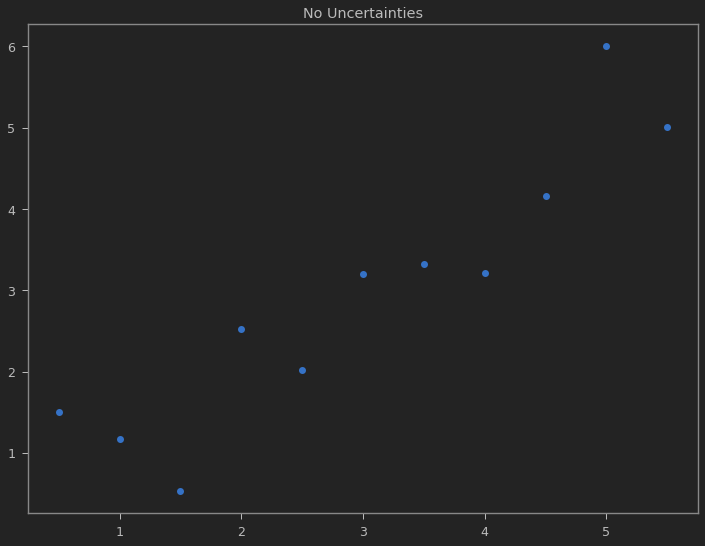

In [16]:
# Let's plot this data, just to see what it looks like

plt.rcParams["figure.figsize"] = (12,9)

figure, axis = plt.subplots(1, 1)
plot1 = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)

# Plot the data in the upper left panel, and give this panel a title
plot1.plot(xi,yi,'o')
plot1.set_title("No Uncertainties")

In [17]:
# First, define a "fitting function", in this case a linear function.

def linear_fit_function(x,*par):
    return par[0]+par[1]*x

In [18]:
# Let's use the curve_fit package from scipy!

from scipy.optimize import curve_fit

# We will provide some initial values for the parameters, but as stated above, we do not
# need to do this for a linear (or polynomial) fitting function.  I include it here for
# completeness!

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(linear_fit_function,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

print ("Covariance Matrix:")
print(pcov)
print()
print ("Best Fit Parameters (expect 0 and 1, nominally):")
print(popt)
print()
print ("Errors in Fit Parameters:")
print(perr)

Covariance Matrix:
[[ 0.20076628 -0.05237382]
 [-0.05237382  0.01745794]]

Best Fit Parameters (expect 0 and 1, nominally):
[0.2197772  0.91606745]

Errors in Fit Parameters:
[0.44806951 0.13212849]


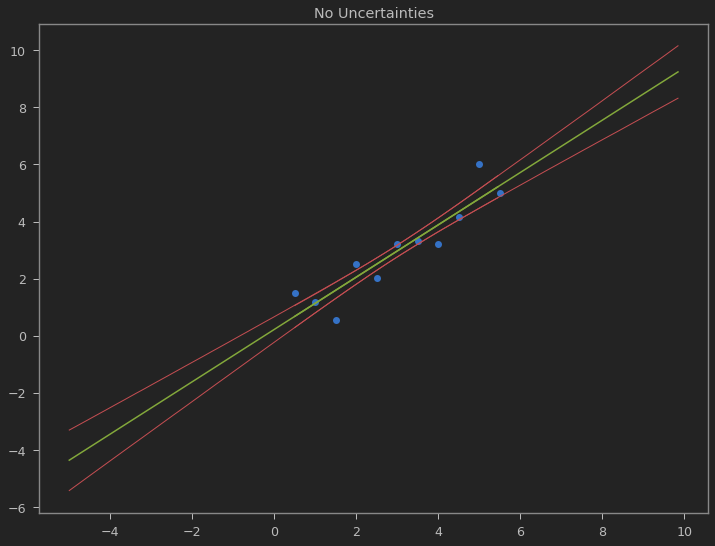

In [20]:
# Now, let's do some plotting magic!

# define a finely spaced array of x points, and then evaluate the y-values at
# each of these points, using the linear fit function with the best fit parameters from
# curve_fit

nfitpoints = 100
xhigh = 10.0
xlow = -5.0
dx = (xhigh-xlow)/nfitpoints

xfitting = []
yfitting = []
for i in range(0,nfitpoints):
    xfitting.append(xlow+dx*i)
    yfitting.append(linear_fit_function(xfitting[i],*popt))
xfitting = np.array(xfitting)
yfitting = np.array(yfitting)
    
plot1.plot(xfitting,yfitting,'g')

#
# we would like to get a sense of the range of possible "best fit" lines, visually, 
# based on the known parameter uncertainties. 
#
# one way to do this is to generate a statistical sample (10000 in this case) of possible
# best fit lines.  we do this by creating a random sample of fit parameter vectors, based
# on popt and pcov.  then, we use this random sample to create a random sample of fit lines
# (ysample).  We can then take the 16th and 84th percentile of these 10000 best fit lines
# to get a +/- 1 sigma lower and upper bound.

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([linear_fit_function(xfitting,*pi) for pi in ps])

lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)
middle = (lower+upper)/2.0

plot1.plot(xfitting,lower,'r-',linewidth=1)
plot1.plot(xfitting,upper,'r-',linewidth=1)

plot1.grid()

figure